In [1]:
# import libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotnine as pn
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)

In [3]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
# extract the year from the title column
wine['year'] = wine['title'].str.extract('([1-2][0-9]{3})').astype('float64')

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  year                   125362 non-null  float64
dtypes: float64(2), int64(1), object(11)


I was able to extact most of the years.

Some countries are well-known for their wine production, so I will create a new dataset with those countries.

In [66]:
good_countries = wine.loc[wine.country.isin(['US','Italy','Portugal','Spain','France','Germany','Australia']),:]

In [7]:
good_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112967 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                112967 non-null  object 
 1   description            112967 non-null  object 
 2   designation            79398 non-null   object 
 3   points                 112967 non-null  int64  
 4   price                  104817 non-null  float64
 5   province               112967 non-null  object 
 6   region_1               104720 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            87038 non-null   object 
 9   taster_twitter_handle  82290 non-null   object 
 10  title                  112967 non-null  object 
 11  variety                112967 non-null  object 
 12  winery                 112967 non-null  object 
 13  year                   108571 non-null  float64
dtypes: float64(2), int64(1), object(11)


The decrease in number of rows is not that significant, which means most reviews are from the top 7 countries.

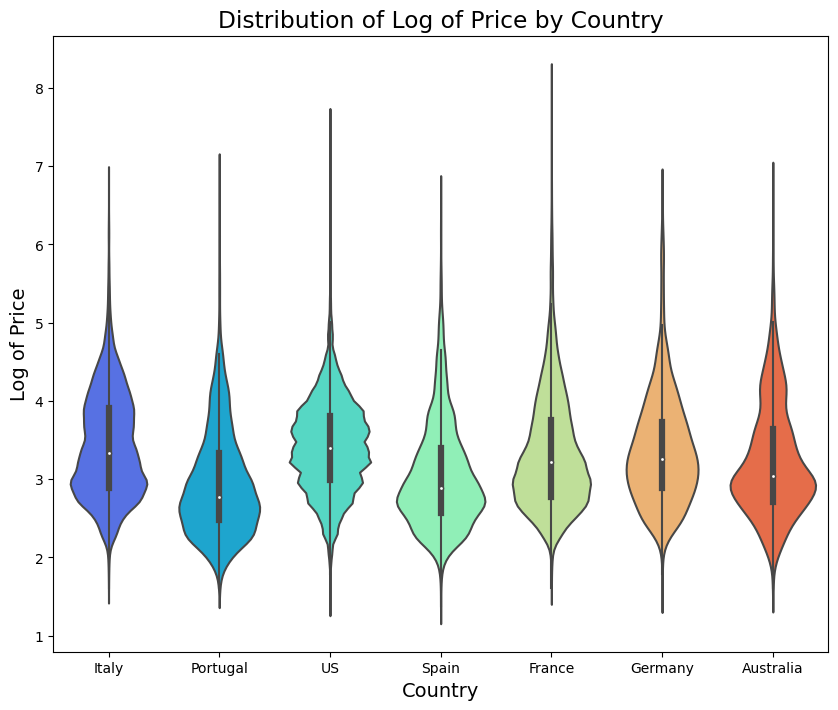

In [8]:
plt.subplots(figsize=(10,8))

sns.violinplot(x = good_countries['country'],y = np.log(good_countries['price']), figure_size = [2,2], palette='rainbow')

plt.rc('font', size=14)
plt.title("Distribution of Log of Price by Country")
plt.xlabel("Country", fontsize=14)
plt.ylabel("Log of Price", fontsize=14)

plt.show()

Above, I used log price because otherwise the distribution of price is very skewed.

#### Average Wine Price by Rating for each Country

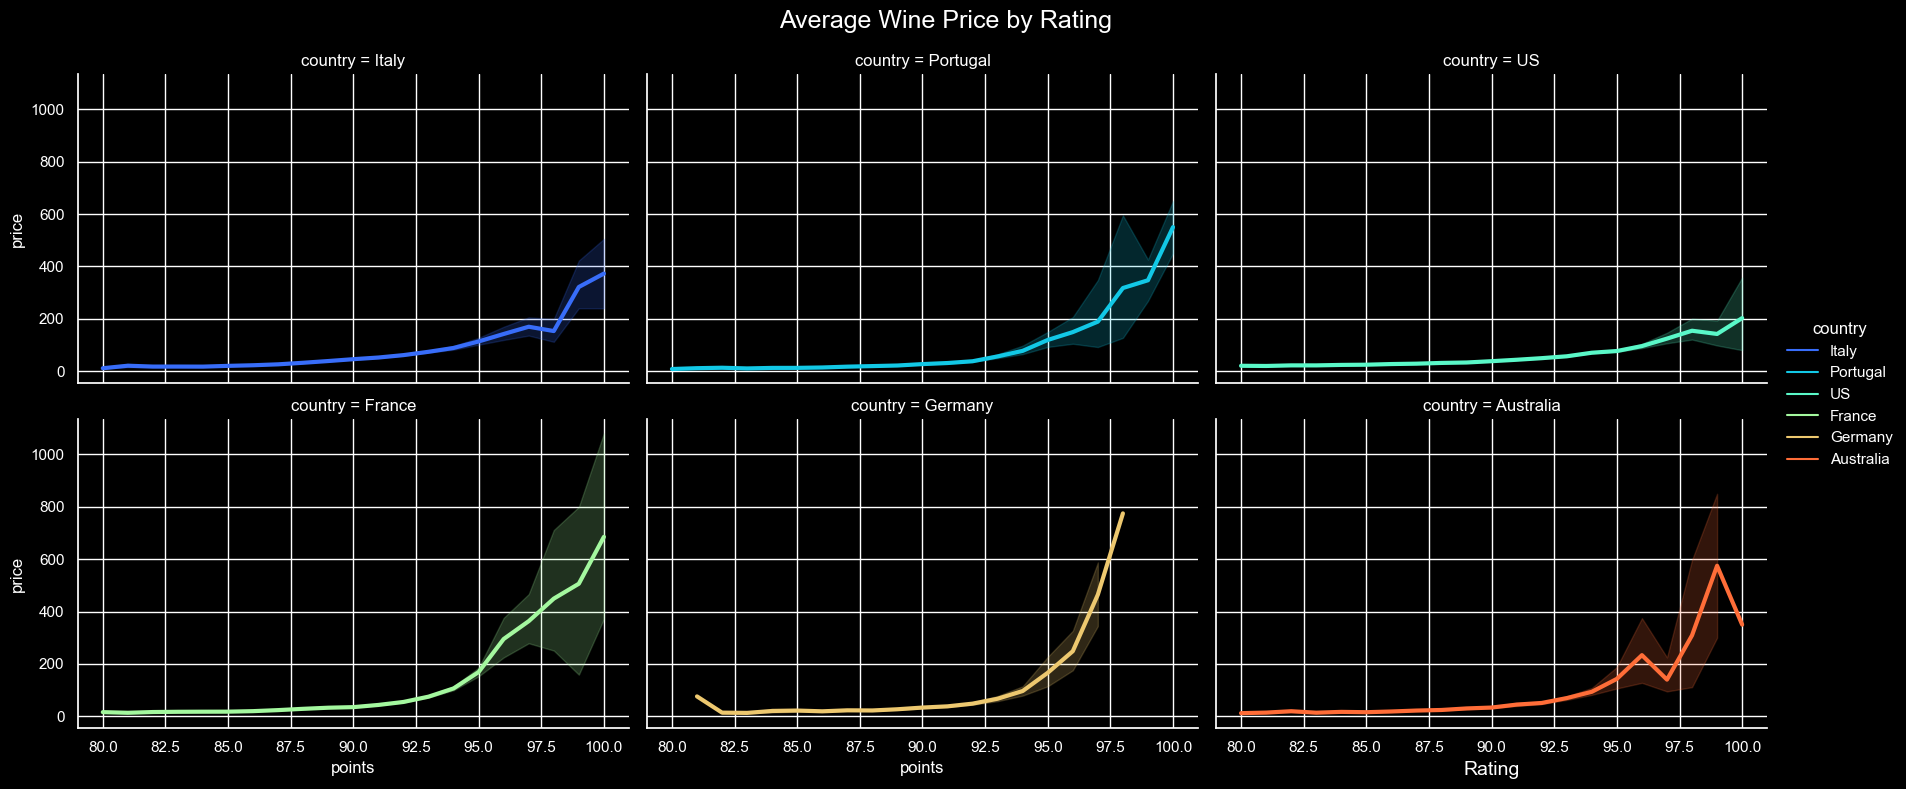

In [60]:
sns.relplot(x='points', y='price', hue='country', col='country', col_wrap=3, kind='line', data=good_countries, 
            palette='rainbow', height=4, aspect=1.5, linewidth=3)

plt.suptitle("Average Wine Price by Rating", fontsize=18)
plt.subplots_adjust(top=0.9)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Average Price", fontsize=14)

# dark background
plt.style.use('dark_background')

plt.show()

I'll extract yearly price and points mean, max from the whole data to compare them visually:

In [10]:
yearly_price_mean = wine.groupby('year').price.agg(['mean'])
yearly_price_max = wine.groupby('year').price.agg(['max'])
yearly_point_mean = wine.groupby('year').points.agg(['mean'])
yearly_point_max = wine.groupby('year').points.agg(['max'])

In [11]:
wine['year'].value_counts().sort_index()

1000.0        2
1070.0        1
1150.0        2
1492.0        6
1503.0        1
          ...  
2013.0    15855
2014.0    15570
2015.0    10042
2016.0     3690
2017.0       11
Name: year, Length: 89, dtype: int64

I'll exclude years before 1994 because there are only a few observations for those years and the years are very far apart, it doesn't make much sense.

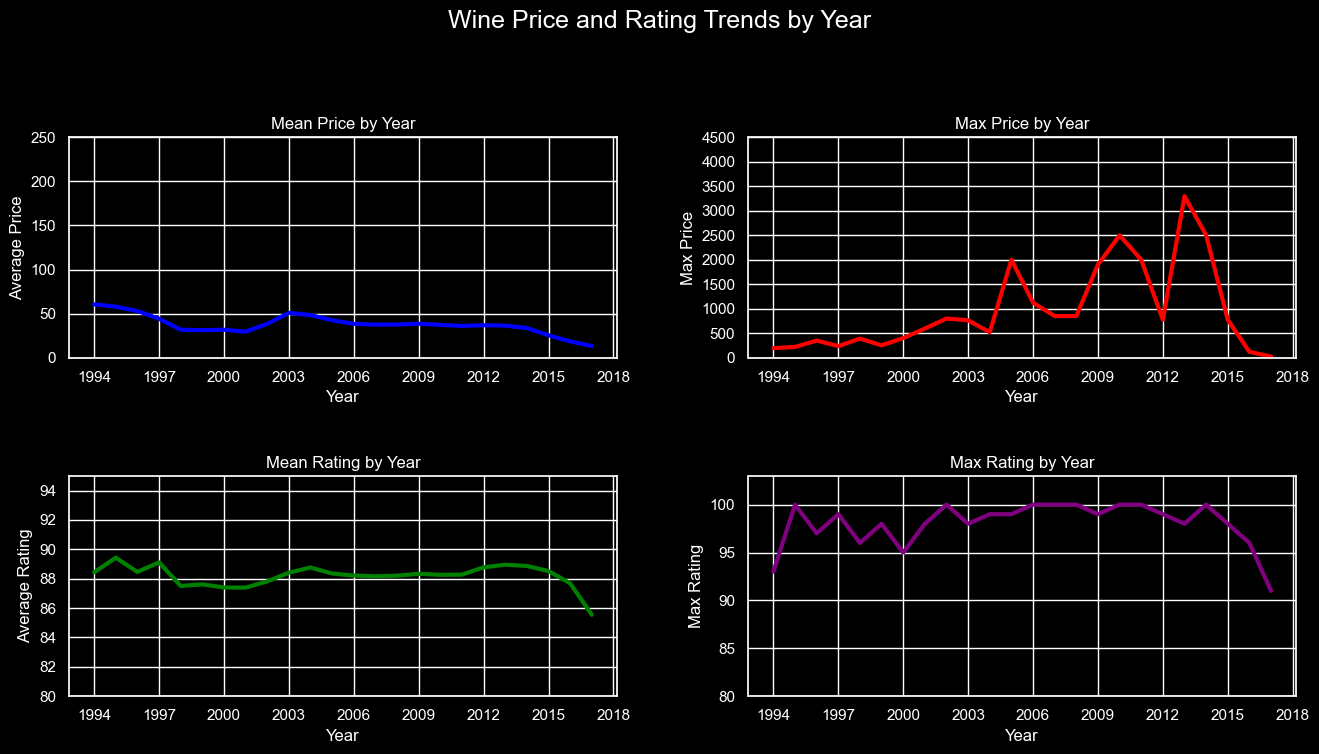

In [54]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 8))

# Mean Price by Year
(yearly_price_mean[yearly_point_mean.index >= 1994]
.plot.line(title='Mean Price by Year', ax=axarr[0][0], legend=False, color='blue', linewidth=3)
.set(xlabel='Year', ylabel='Average Price', ylim=(0, None), xticks=range(1994, 2020, 3), yticks=range(0, 300, 50)))

# Max Price by Year
(yearly_price_max[yearly_point_max.index >= 1994]
.plot.line(title='Max Price by Year', ax=axarr[0][1], legend=False, color='red', linewidth=3)
.set(xlabel='Year', ylabel='Max Price', ylim=(0, None), xticks=range(1994, 2020, 3), yticks=range(0, 5000, 500)))

# Mean Rating by Year
(yearly_point_mean[yearly_point_mean.index >= 1994]
.plot.line(title='Mean Rating by Year', ax=axarr[1][0], legend=False, color='green', linewidth=3)
.set(xlabel='Year', ylabel='Average Rating', ylim=(80, 95), xticks=range(1994, 2020, 3), yticks=range(80, 96, 2)))

# Max Rating by Year
(yearly_point_max[yearly_point_max.index >= 1994]
.plot.line(title='Max Rating by Year', ax=axarr[1][1], legend=False, color='purple', linewidth=3)
.set(xlabel='Year', ylabel='Max Rating', ylim=(80, 103), xticks=range(1994, 2020, 3), yticks=range(80, 101, 5)))

# Add main title and adjust subplots spacing
fig.suptitle('Wine Price and Rating Trends by Year', fontsize=18)
fig.tight_layout(pad=3)

# set dark background
sns.set(style="darkgrid")
plt.style.use('dark_background')

plt.show()

### Basic Text Analysis
There are some words in wine reviews that are common and do not belong to any particular wine. I will try to see how frequent those words are in the reviews.

In [13]:
is_word_used = wine['description'].str.contains(pat = 'aroma|taste|color|grape|age')

In [14]:
sum(is_word_used)/len(is_word_used)

0.5091982057535912

This result means that about 51% reviews contain the common words I selected above.

### Wine Production Year

In [15]:
# extract the year from the title column
wine['year'] = wine['title'].str.extract('([1-2][0-9]{3})').astype('float64')

In [16]:
wine.describe()

,points,price,year
count,129971.000000,120975.000000,125362.000000
mean,88.447138,35.363389,2010.431407
std,3.039730,41.022218,9.675811
min,80.000000,4.000000,1000.000000
25%,86.000000,17.000000,2009.000000
50%,88.000000,25.000000,2011.000000
75%,91.000000,42.000000,2013.000000
max,100.000000,3300.000000,2017.000000


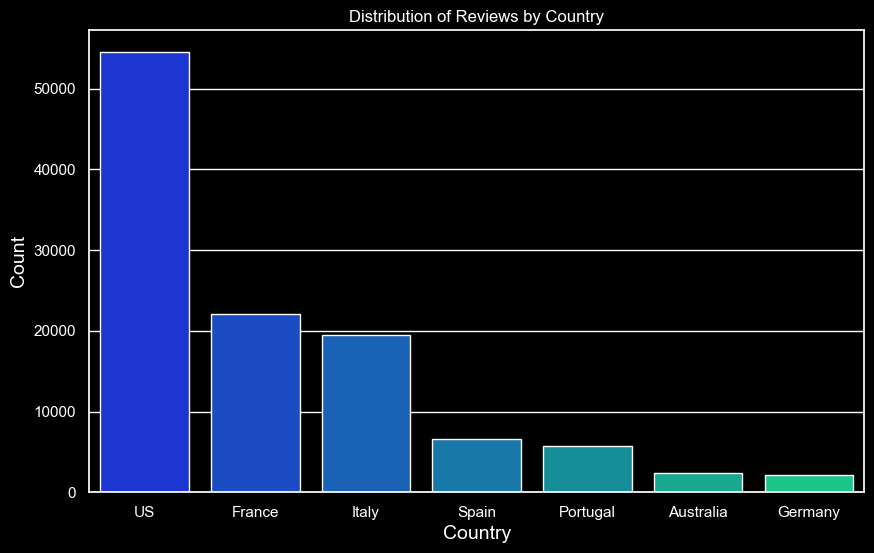

<Figure size 640x480 with 0 Axes>

In [74]:
# distribution of reviews by country
plt.subplots(figsize=(10,6))

sns.countplot(x = good_countries['country'], palette='winter', order=good_countries['country'].value_counts().index)

plt.rc('font', size=14)
plt.title("Distribution of Reviews by Country")
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.show()
# change figure color to dark
plt.style.use('dark_background')

# save as image
plt.savefig('reviews_by_country.png')

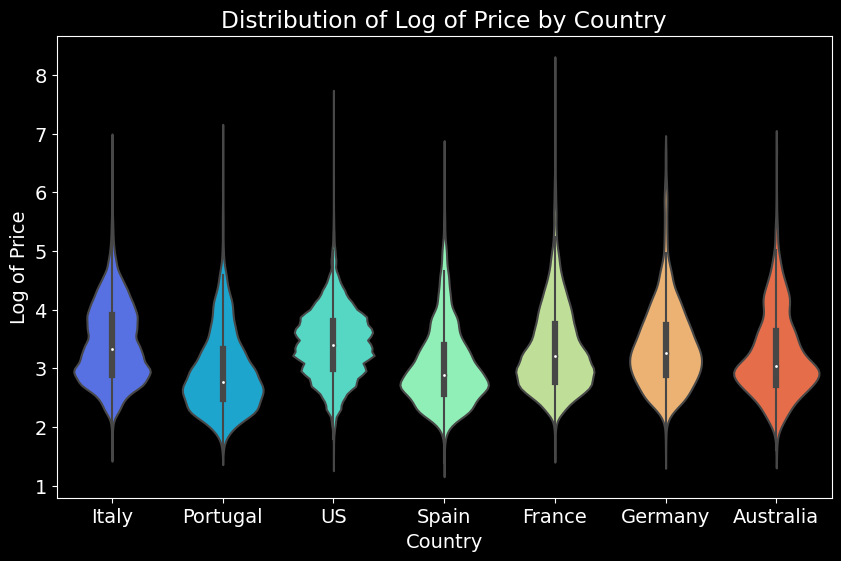

In [44]:
# distribution of log price by country
plt.subplots(figsize=(10,6))

sns.violinplot(x = good_countries['country'],y = np.log(good_countries['price']), figure_size = [2,2], palette='rainbow')

plt.rc('font', size=14)
plt.title("Distribution of Log of Price by Country")
plt.xlabel("Country", fontsize=14)
plt.ylabel("Log of Price", fontsize=14)

plt.show()


In [72]:
# find imbalance in data
wine['country'].value_counts()


US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  